## Create White Noise

In [1]:
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt

stop = 10
Srate = 44100
x1=np.linspace(0, stop, Srate*stop)
A=0.5
y1 = np.random.rand(Srate * stop)-A

plt.plot(x1, y1)
plt.show();

<Figure size 640x480 with 1 Axes>

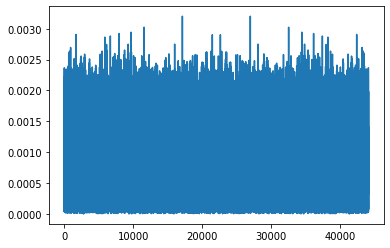

In [2]:
f  = np.linspace(1/float(stop), 44100, Srate * stop)
y11 = np.fft.fft(y1)/float(Srate * stop /2)
plt.plot(f, np.abs(y11))
plt.show();

## Settings

In [3]:
fs = Srate # 44100
nyq = fs / 2.0  # ナイキスト周波数
fe1 = 5000.0 / nyq      # カットオフ周波数1
fe2 = 10000.0 / nyq      # カットオフ周波数2
numtaps = 255           # フィルタ係数（タップ）の数（要奇数）

## Lowpass

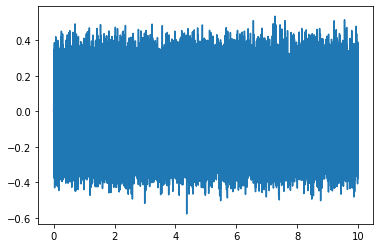

In [4]:
b = firwin(numtaps, fe1)                         # Low-pass
y = lfilter(b, 1, y1)
plt.plot(x1, y)

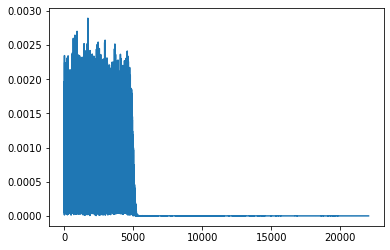

In [5]:
y = np.fft.rfft(y)/float(Srate * stop /2)
plt.plot(f[:int(len(f)/2)+1], np.abs(y))
plt.show();

## Highpass

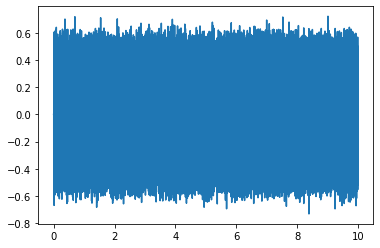

In [6]:
b = firwin(numtaps, fe2, pass_zero=False)        # High-pass
y = lfilter(b, 1, y1)
plt.plot(x1, y)

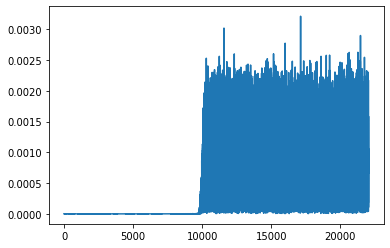

In [7]:
y = np.fft.rfft(y)/float(Srate * stop /2)
plt.plot(f[:int(len(f)/2)+1], np.abs(y))
plt.show();

## Bandpass

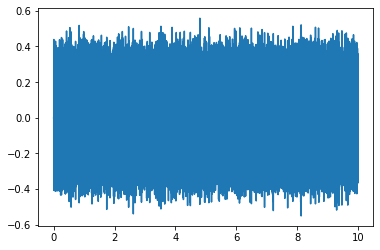

In [8]:
b = firwin(numtaps, [fe1, fe2], pass_zero=False) # Band-pass
y = lfilter(b, 1, y1)
plt.plot(x1, y)

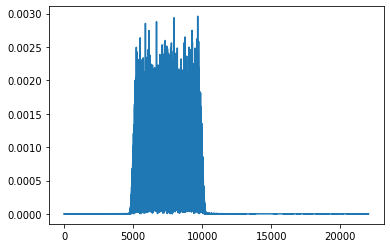

In [9]:
y = np.fft.rfft(y)/float(Srate * stop /2)
plt.plot(f[:int(len(f)/2)+1], np.abs(y))
plt.show();

## Bandstop

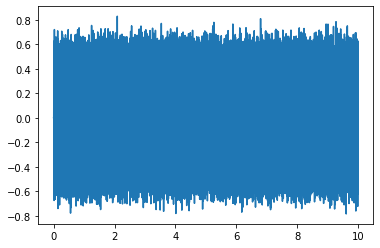

In [10]:
b = firwin(numtaps, [fe1, fe2])                  # Band-stop
y = lfilter(b, 1, y1)
plt.plot(x1, y)

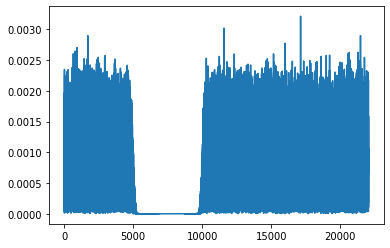

In [11]:
y = np.fft.rfft(y)/float(Srate * stop /2)
plt.plot(f[:int(len(f)/2)+1], np.abs(y))
plt.show();